<a href="https://colab.research.google.com/github/luccidomingues/US-Fatal-Police-Shootings/blob/master/Publi_Fatal_Police_Shootings_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando bibliotecas

In [127]:

# pip install plotly

## Importando bibliotecas
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns

import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

Black Americans are disproportionately killed by police.

Although half of the people shot and killed by police are white, black Americans are shot at a disproportionate rate. They account for just 13 percent of the U.S. population, but more than a quarter of police shooting victims. The disparity is even more pronounced among unarmed victims, of whom more than a third are black.

In [128]:
Fatal_police = pd.read_csv('fatal-police-shootings-data.csv',sep=',')
Fatal_police.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [129]:
Fatal_police.shape

(5573, 14)

In [130]:
Fatal_police.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                      214
age                        248
gender                       1
race                       598
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       264
body_camera                  0
dtype: int64

In [131]:
Fatal_police.update(Fatal_police['race'].fillna('Not Informed'))
Fatal_police.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                      214
age                        248
gender                       1
race                         0
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       264
body_camera                  0
dtype: int64

In [132]:
states_names = {'AK':'Alaska',
         'AL':'Alabama',
         'AR':'Arkansas','AZ':'Arizona',
         'CA':'California','CO':'Colorado',
         'CT':'Connecticut',
         'DC':'DC',
         'DE':'Delaware',
         'FL':'Florida',
         'GA':'Georgia',
         'HI':'Hawaii',
         'IA':'Iowa',
         'ID':'Idaho',
         'IL':'Illinois',
         'IN':'Indiana',
         'KS':'Kansas',
         'KY':'Kentucky',
         'LA':'Louisiana',
         'MA':'Massachusetts',
         'MD':'Maryland',
         'ME':'Maine',
         'MI':'Michigan',
         'MN':'Minnesota',
         'MO':'Missouri',
         'MS':'Mississippi',
         'MT':'Montana',
         'NC':'North Carolina',
         'ND':'North Dakota',
         'NE':'Nebraska',
         'NH':'New Hampshire',
         'NJ':'New Jersey',
         'NM':'New Mexico',
         'NV':'Nevada',
         'NY':'New York',
         'OH':'Ohio',
         'OK':'Oklahoma',
         'OR':'Oregon',
         'PA':'Pennsylvania',
         'RI':'Rhode Island',
         'SC':'South Carolina',
         'SD':'South Dakota',
         'TN':'Tennessee',
         'TX':'Texas',
         'UT':'Utah',
         'VA':'Virginia',
         'VT':'Vermont',
         'WA':'Washington',
         'WI':'Wisconsin',
         'WV':'West Virginia',
         'WY':'Wyoming'}


sex = {'M': 'Male', 'F': 'Female'}


race = {'A': 'Asian', 
       'B': 'Black', 
       'H': 'Hispanic', 
       'N': 'Native American', 
       'O': 'Other', 
       'W': 'White'}


In [133]:
total_race_percent = round(Fatal_police['race'].value_counts(normalize=True) * 100,2)
total_race_percent.rename(index = race, inplace = True)

total_race_percent

White              45.27
Black              23.60
Hispanic           16.45
Not Informed       10.73
Asian               1.69
Native American     1.40
Other               0.86
Name: race, dtype: float64

In [134]:
total_race_percent_df = pd.DataFrame(total_race_percent)
total_race_percent_df.reset_index(level=0, inplace=True)

total_race_percent_df.columns = ["race", "total_percent"] 

total_race_percent_df.head(10)

,race,total_percent
0,White,45.27
1,Black,23.60
2,Hispanic,16.45
3,Not Informed,10.73
4,Asian,1.69
5,Native American,1.40
6,Other,0.86


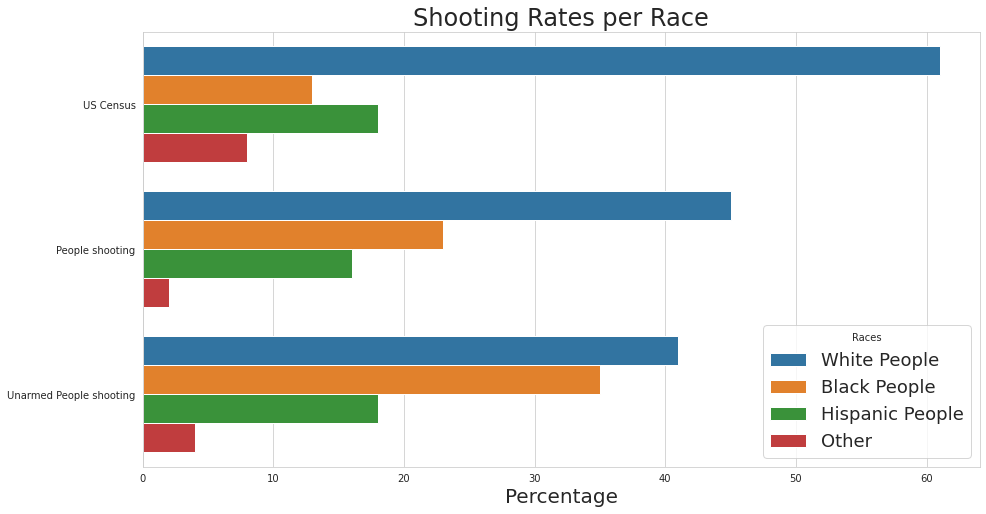

In [135]:
White = 61
Black = 13
Hispanic = 18
Other = 5.9 + 1.5 + 0.6

# Asian	1.69
# 5	Native American	1.40
# 6	Other	0.86

White_Shoot = int(total_race_percent_df.query('race == "White"').total_percent)
Black_Shoot = int(total_race_percent_df.query('race == "Black"').total_percent)
Hispanic_Shoot = int(total_race_percent_df.query('race == "Hispanic"').total_percent)

Other_S1 = total_race_percent_df.query('race == "Asian"').total_percent
Other_S2 = total_race_percent_df.query('race == "Native American"').total_percent
Other_S3 = total_race_percent_df.query('race == "Other"').total_percent
Other_S = int(Other_S1) + int(Other_S2) + int(Other_S3)


total_race_percent_unarmed = round(Fatal_police.query('armed == "unarmed"')['race'].value_counts(normalize=True) * 100)
# total_race_percent_unarmed.rename(index = race, inplace = True)

White_Shoot_Unarmed = int(total_race_percent_unarmed.W)
Black_Shoot_Unarmed = int(total_race_percent_unarmed.B)
Hispanic_Shoot_Unarmed = int(total_race_percent_unarmed.H)

Other_U1 = total_race_percent_unarmed.A
Other_U2 = total_race_percent_unarmed.N
Other_U3 = total_race_percent_unarmed.O
Other_U = int(Other_U1) + int(Other_U2) + int(Other_U3)

df = pd.DataFrame(data = {'race': ["White People","White People","White People","Black People","Black People","Black People","Hispanic People","Hispanic People","Hispanic People","Other","Other","Other"],
                          'percentual': [White,White_Shoot,White_Shoot_Unarmed,Black,Black_Shoot,Black_Shoot_Unarmed,Hispanic,Hispanic_Shoot,Hispanic_Shoot_Unarmed,Other,Other_S,Other_U],
                          'type_percentual': ["US Census","People shooting","Unarmed People shooting","US Census","People shooting","Unarmed People shooting","US Census","People shooting","Unarmed People shooting","US Census","People shooting","Unarmed People shooting"]})

plt.figure(figsize=(15,8))
fig = sns.barplot(x='percentual',y='type_percentual',data=df, hue="race", orient='h')
fig.set_title('Shooting Rates per Race', fontsize=24)    # Configurando o título do gráfico
fig.legend(title='Races',fontsize=18)
plt.xlabel('Percentage',fontsize=20)
plt.ylabel('')

plt.show()


In [136]:
armed_number = Fatal_police['armed'].value_counts()

armed_number_df = pd.DataFrame(armed_number)
armed_number_df.reset_index(level=0, inplace=True)

armed_number_df.columns = ["armed", "total_number"] 
armed_number_df

,armed,total_number
0,gun,3157
1,knife,823
2,unarmed,356
3,toy weapon,193
4,undetermined,169
...,...,...
89,motorcycle,1
90,stapler,1
91,bow and arrow,1
92,gun and sword,1


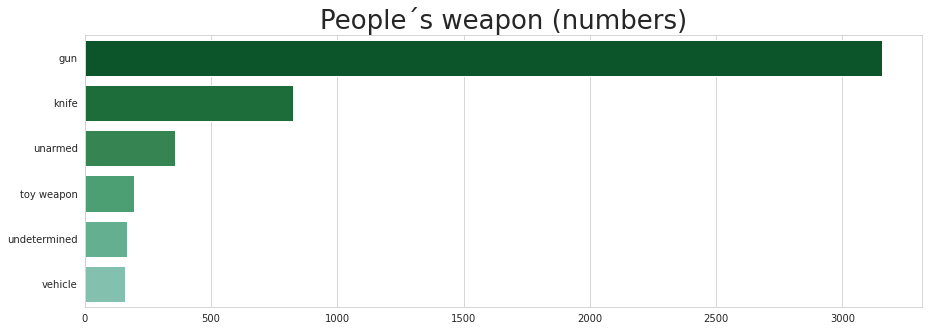

In [137]:
armed_number_df_filter = armed_number_df.query('total_number > 150')

sns.set_style("whitegrid")
ax = sns.barplot(x=armed_number_df_filter.total_number, 
                 y=armed_number_df_filter.armed, 
                 data=armed_number_df_filter, 
                 orient='h',
                 palette=sns.color_palette("BuGn_r", n_colors=len(armed_number_df_filter) + 4))

ax.figure.set_size_inches(15, 5)    # Personalizando o tamanho da figura

ax.set_title('People´s weapon (numbers)', fontsize=26)    # Configurando o título do gráfico
ax.set_xlabel('', fontsize=14)    # Configurando o label do eixo X
ax.set_ylabel('', fontsize=14)    # Configurando o label do eixo Y
ax

In [138]:
per_state = Fatal_police['state'].value_counts()
per_state.rename(index = states_names, inplace = True)
per_state

California        825
Texas             494
Florida           368
Arizona           258
Colorado          204
Georgia           188
Oklahoma          170
North Carolina    162
Ohio              159
Washington        156
Tennessee         147
Missouri          145
Louisiana         113
Pennsylvania      111
New Mexico        108
Illinois          105
Alabama           104
New York          102
Nevada            102
Indiana            99
Kentucky           98
Virginia           96
Wisconsin          95
South Carolina     91
Oregon             87
Arkansas           83
Michigan           82
Maryland           79
New Jersey         70
Mississippi        66
Utah               66
Minnesota          62
West Virginia      54
Kansas             50
Idaho              42
Alaska             40
Massachusetts      35
Montana            33
Iowa               32
Hawaii             30
Nebraska           25
Maine              22
Connecticut        21
South Dakota       17
Wyoming            14
DC        

In [139]:
state_count = pd.DataFrame(per_state)
state_count.reset_index(level=0, inplace=True)

state_count.columns = ["state", "deaths_total"] 

state_count.head()


,state,deaths_total
0,California,825
1,Texas,494
2,Florida,368
3,Arizona,258
4,Colorado,204


# Total deaths per state in a horizontal bar

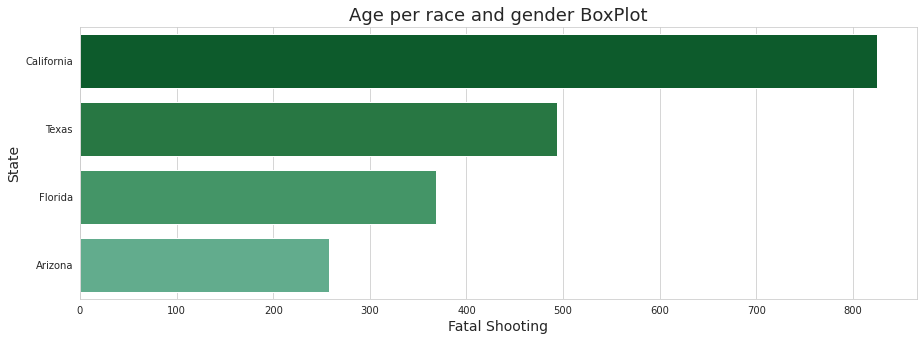

In [140]:
state_count_graf = state_count.query('deaths_total > 250')
sns.set_style("whitegrid")
ax = sns.barplot(x=state_count_graf.deaths_total, 
                 y=state_count_graf.state, 
                 data=state_count_graf, 
                 orient='h',
                 palette=sns.color_palette("BuGn_r", n_colors=len(state_count_graf) + 4))

ax.figure.set_size_inches(15, 5)    # Personalizando o tamanho da figura

ax.set_title('Age per race and gender BoxPlot', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('Fatal Shooting', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('State', fontsize=14)    # Configurando o label do eixo Y
ax

# **Fatal Shooting per race in California**

In [141]:
total_race_percent_CA = round(Fatal_police.query('state == "CA"')['race'].value_counts(normalize=True) * 100)
total_race_percent_CA.rename(index = race, inplace = True)

total_race_percent_CA

Hispanic           39.0
White              27.0
Black              15.0
Not Informed       14.0
Asian               4.0
Other               1.0
Native American     0.0
Name: race, dtype: float64

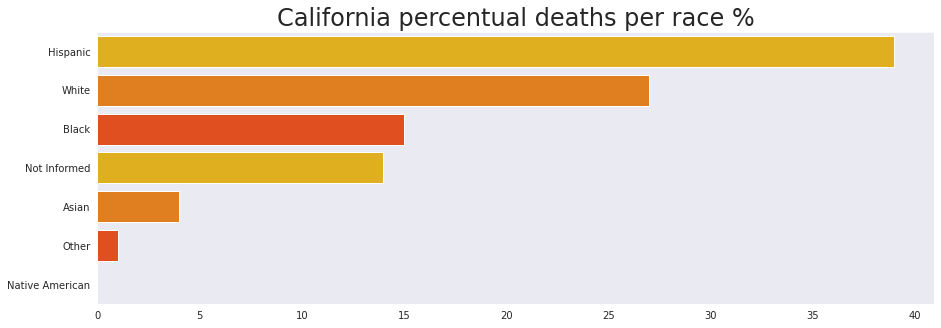

In [142]:
total_race_percent_CA_df = pd.DataFrame(total_race_percent_CA)
total_race_percent_CA_df.reset_index(level=0, inplace=True)

total_race_percent_CA_df.columns = ["race", "deaths_total"] 

# total_race_percent_CA_df.head()

sns.set_style("dark")
ax = sns.barplot(x=total_race_percent_CA_df.deaths_total, 
                 y=total_race_percent_CA_df.race, 
                 data=total_race_percent_CA_df, 
                 orient='h',
                 palette=sns.color_palette("autumn_r", n_colors=len(total_race_percent_CA_df) - 4))

ax.figure.set_size_inches(15, 5)    # Personalizando o tamanho da figura

ax.set_title('California percentual deaths per race %', fontsize=24)    # Configurando o título do gráfico

ax.set_ylabel('', fontsize=14)    # Configurando o label do eixo Y
ax.set_xlabel('', fontsize=14)    # Configurando o label do eixo X


ax


# tentando colocar uma barra em outra cor
# barplot = plt.bar(y_pos, odds_number, color = 'darkgreen', alpha = 0.85)
# barplot[0].set_color('darkred')
# plt.xlabel('Factors', fontsize = 15, weight = 'bold')

# **Fatal Shooting per race in Texas**

In [143]:
total_race_percent_TX = round(Fatal_police.query('state == "TX"')['race'].value_counts(normalize=True) * 100)
total_race_percent_TX.rename(index = race, inplace = True)

total_race_percent_TX

White              36.0
Hispanic           30.0
Black              20.0
Not Informed       12.0
Asian               1.0
Other               1.0
Native American     0.0
Name: race, dtype: float64

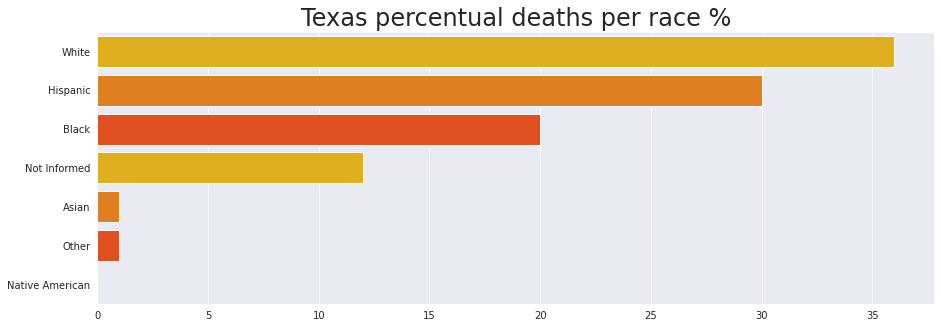

In [144]:
total_race_percent_TX_df = pd.DataFrame(total_race_percent_TX)
total_race_percent_TX_df.reset_index(level=0, inplace=True)

total_race_percent_TX_df.columns = ["race", "deaths_total"] 

# total_race_percent_TX_df.head()

sns.set_style("darkgrid")
ax = sns.barplot(x=total_race_percent_TX_df.deaths_total, 
                 y=total_race_percent_TX_df.race, 
                 data=total_race_percent_TX_df, 
                 orient='h',
                 palette=sns.color_palette("autumn_r", n_colors=len(total_race_percent_TX_df) - 4))

ax.figure.set_size_inches(15, 5)    # Personalizando o tamanho da figura

ax.set_title('Texas percentual deaths per race %', fontsize=24)    # Configurando o título do gráfico

ax.set_ylabel('', fontsize=14)    # Configurando o label do eixo Y
ax.set_xlabel('', fontsize=14)    # Configurando o label do eixo X

ax

# **Fatal Shooting per race in Florida**

In [145]:
total_race_percent_FL = round(Fatal_police.query('state == "FL"')['race'].value_counts(normalize=True) * 100)
total_race_percent_FL.rename(index = race, inplace = True)

total_race_percent_FL

White           44.0
Black           31.0
Hispanic        14.0
Not Informed    10.0
Other            1.0
Asian            0.0
Name: race, dtype: float64

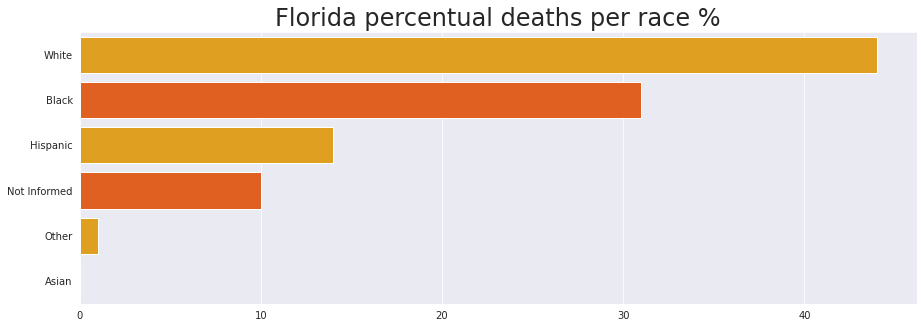

In [146]:
total_race_percent_FL_df = pd.DataFrame(total_race_percent_FL)
total_race_percent_FL_df.reset_index(level=0, inplace=True)

total_race_percent_FL_df.columns = ["race", "deaths_total"] 

# total_race_percent_TX_df.head()

sns.set_style("darkgrid")
ax = sns.barplot(x=total_race_percent_FL_df.deaths_total, 
                 y=total_race_percent_FL_df.race, 
                 data=total_race_percent_FL_df, 
                 orient='h',
                 palette=sns.color_palette("autumn_r", n_colors=len(total_race_percent_FL_df) - 4))

ax.figure.set_size_inches(15, 5)    # Personalizando o tamanho da figura

ax.set_title('Florida percentual deaths per race %', fontsize=24)    # Configurando o título do gráfico

ax.set_ylabel('', fontsize=14)    # Configurando o label do eixo Y
ax.set_xlabel('', fontsize=14)    # Configurando o label do eixo X

ax

# **Fatal Shooting per race in Arizona**

In [147]:
total_race_percent_AZ = round(Fatal_police.query('state == "AZ"')['race'].value_counts(normalize=True) * 100)
total_race_percent_AZ.rename(index = race, inplace = True)

total_race_percent_AZ

White              42.0
Hispanic           33.0
Not Informed       14.0
Black               7.0
Native American     5.0
Name: race, dtype: float64

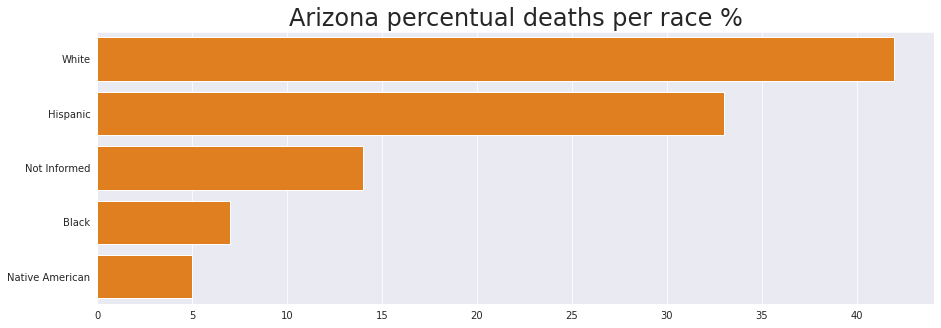

In [148]:
total_race_percent_AZ_df = pd.DataFrame(total_race_percent_AZ)
total_race_percent_AZ_df.reset_index(level=0, inplace=True)

total_race_percent_AZ_df.columns = ["race", "deaths_total"] 

# total_race_percent_TX_df.head()

sns.set_style("darkgrid")
ax = sns.barplot(x=total_race_percent_AZ_df.deaths_total, 
                 y=total_race_percent_AZ_df.race, 
                 data=total_race_percent_AZ_df, 
                 orient='h',
                 palette=sns.color_palette("autumn_r", n_colors=len(total_race_percent_AZ_df) - 4))

ax.figure.set_size_inches(15, 5)    # Personalizando o tamanho da figura

ax.set_title('Arizona percentual deaths per race %', fontsize=24)    # Configurando o título do gráfico

ax.set_ylabel('', fontsize=14)    # Configurando o label do eixo Y
ax.set_xlabel('', fontsize=14)    # Configurando o label do eixo X

ax

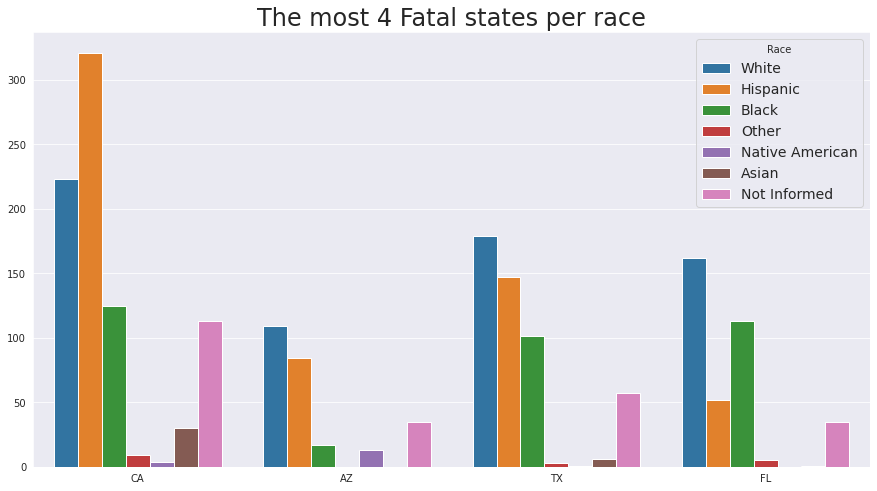

In [149]:
df1 = Fatal_police.query('state in ["CA","TX","FL","AZ"]')

# sort_values(by='state')

plt.figure(figsize=(15,8))
fig = sns.countplot(x='state',data=df1,hue='race')
fig.set_title('The most 4 Fatal states per race', fontsize=24)    # Configurando o título do gráfico

plt.legend(title='Race', labels=['White', 'Hispanic','Black', 'Other','Native American', 'Asian','Not Informed'], fontsize=14)


plt.ylabel('')
plt.xlabel('')

# to save the image
# plt.savefig(os.path.join(IMG_PATH,'classificacao_acidentes.png'), format='png')

plt.show()

In [150]:
Fatal_police.describe()

,id,age
count,5573.000000,5325.000000
mean,3096.198636,37.118685
std,1745.644408,13.102332
min,3.000000,6.000000
25%,1587.000000,27.000000
50%,3100.000000,35.000000
75%,4619.000000,46.000000
max,6097.000000,91.000000


##Fazendo Query

##Fazendo Sorted, valores unicos

In [151]:
sorted(Fatal_police['age'].unique())

[6.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 77.0,
 nan,
 76.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 86.0,
 89.0,
 91.0]

In [152]:
sorted(Fatal_police['manner_of_death'].unique())

['shot', 'shot and Tasered']

In [153]:
Fatal_police['gender'].value_counts()

M    5326
F     246
Name: gender, dtype: int64

In [154]:
Fatal_police['gender'].value_counts(normalize = True) * 100

M    95.585068
F     4.414932
Name: gender, dtype: float64

In [155]:
frequencia = Fatal_police['gender'].value_counts()
frequencia

M    5326
F     246
Name: gender, dtype: int64

In [156]:
percentual = Fatal_police['gender'].value_counts(normalize = True) * 100
percentual

M    95.585068
F     4.414932
Name: gender, dtype: float64

In [157]:
dist_freq_qualitativas = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})
dist_freq_qualitativas

,Frequência,Porcentagem (%)
M,5326,95.585068
F,246,4.414932


In [158]:
dist_freq_qualitativas.rename_axis('Sexo', axis= 'columns', inplace = True)
dist_freq_qualitativas

Sexo,Frequência,Porcentagem (%)
M,5326,95.585068
F,246,4.414932


## Fazendo o CrossTab
https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.crosstab.html

In [159]:
Fatal_police.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                      214
age                        248
gender                       1
race                         0
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       264
body_camera                  0
dtype: int64

In [160]:
# Checando os dados
sorted(Fatal_police['race'].unique())

['A', 'B', 'H', 'N', 'Not Informed', 'O', 'W']

In [161]:
frequencia = pd.crosstab(Fatal_police.gender, Fatal_police.race)
frequencia.rename(index = sex, inplace = True)
frequencia.rename(columns = race, inplace = True)
frequencia

race,Asian,Black,Hispanic,Native American,Not Informed,Other,White
gender,,,,,,,
Female,5,47,27,5,13,4,145
Male,89,1268,890,73,585,44,2377


In [162]:
percentual = pd.crosstab(Fatal_police.gender, Fatal_police.race, 
                         normalize = True) * 100
percentual.rename(index = sex, inplace = True)
percentual.rename(columns = race, inplace = True)
percentual

race,Asian,Black,Hispanic,Native American,Not Informed,Other,White
gender,,,,,,,
Female,0.089734,0.843503,0.484566,0.089734,0.233309,0.071788,2.602297
Male,1.597272,22.756640,15.972721,1.310122,10.498923,0.789663,42.659727


In [163]:
percentual = pd.crosstab(Fatal_police.gender, 
                         Fatal_police.race, 
                         aggfunc = 'mean',
                         values = Fatal_police.age)
percentual.rename(index = sex, inplace = True)
percentual.rename(columns = race, inplace = True)
percentual

race,Asian,Black,Hispanic,Native American,Not Informed,Other,White
gender,,,,,,,
Female,38.000000,34.808511,31.148148,31.200000,38.777778,31.250000,39.486111
Male,36.482759,32.391479,33.591696,31.694444,43.766355,33.139535,39.973965


## Histogramas

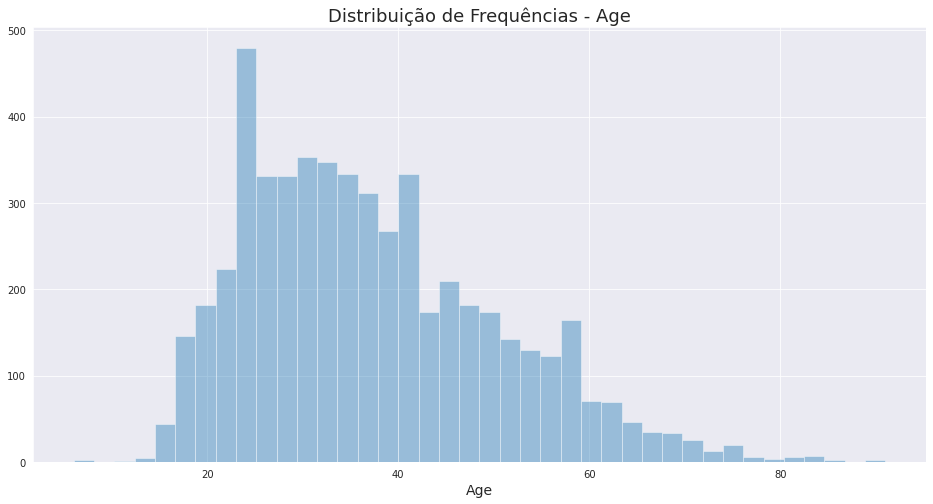

In [164]:
ax = sns.distplot(Fatal_police.age, kde = False)

ax.figure.set_size_inches(16, 8)
ax.set_title('Distribuição de Frequências - Age', fontsize=18)
ax.set_xlabel('Age', fontsize=14)
ax

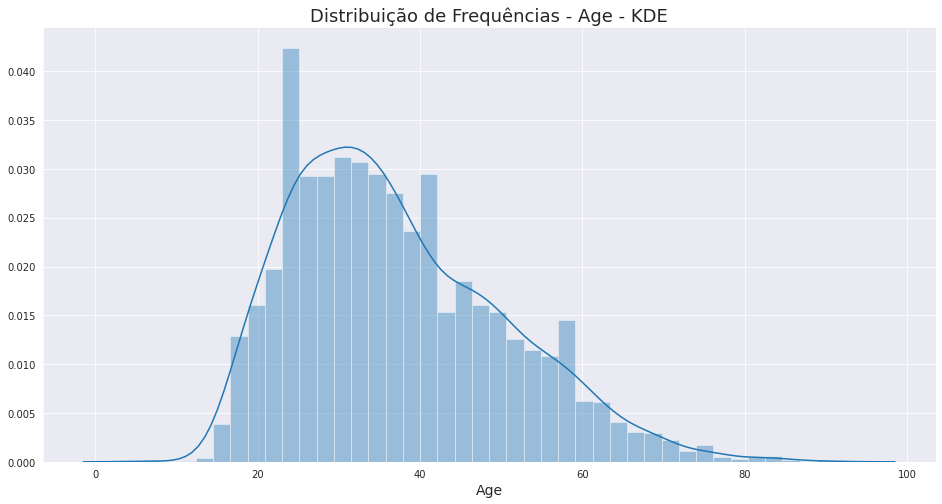

In [165]:
ax = sns.distplot(Fatal_police.age)


ax.figure.set_size_inches(16, 8)
ax.set_title('Distribuição de Frequências - Age - KDE', fontsize=18)
ax.set_xlabel('Age', fontsize=14)
ax

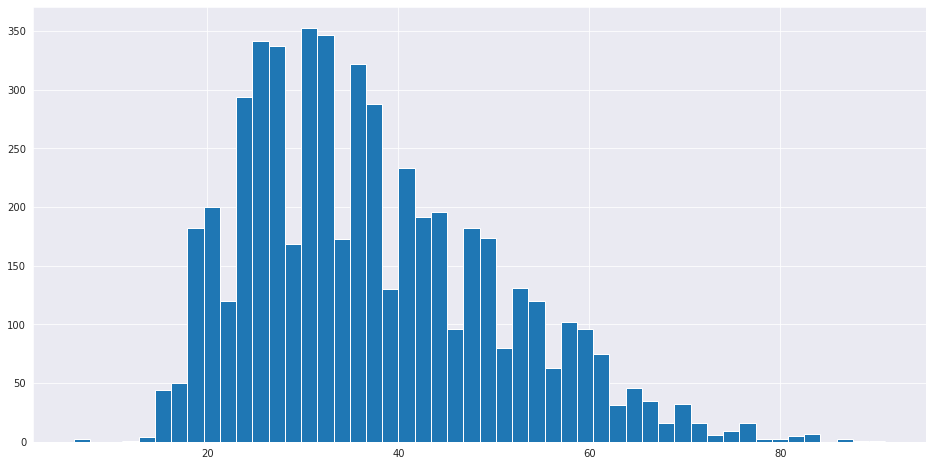

In [166]:
Fatal_police.age.hist(bins = 50, figsize=(16, 8))

## Boxplot Seaborn

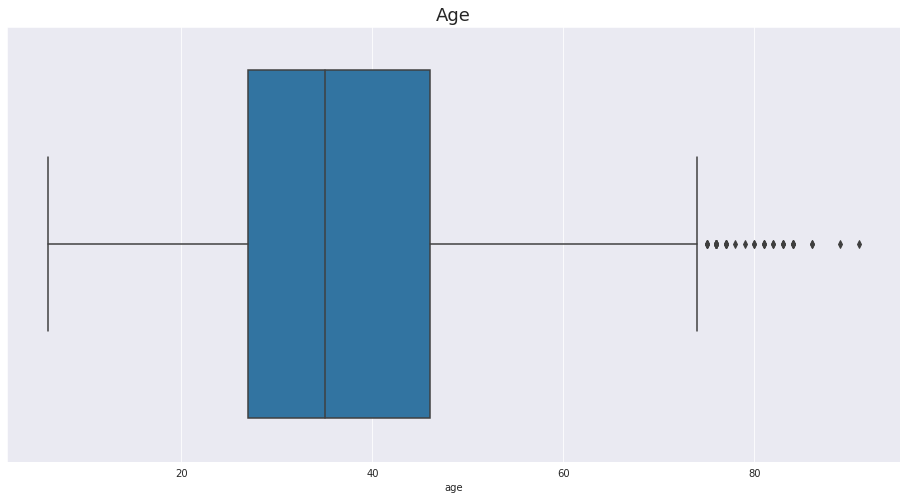

In [167]:

ax = sns.boxplot(x = 'age', data = Fatal_police, orient='h')
ax.figure.set_size_inches(16, 8)
ax.set_title('Age', fontsize=18)
# ax.set_xlabel('Years', fontsize=14)
ax

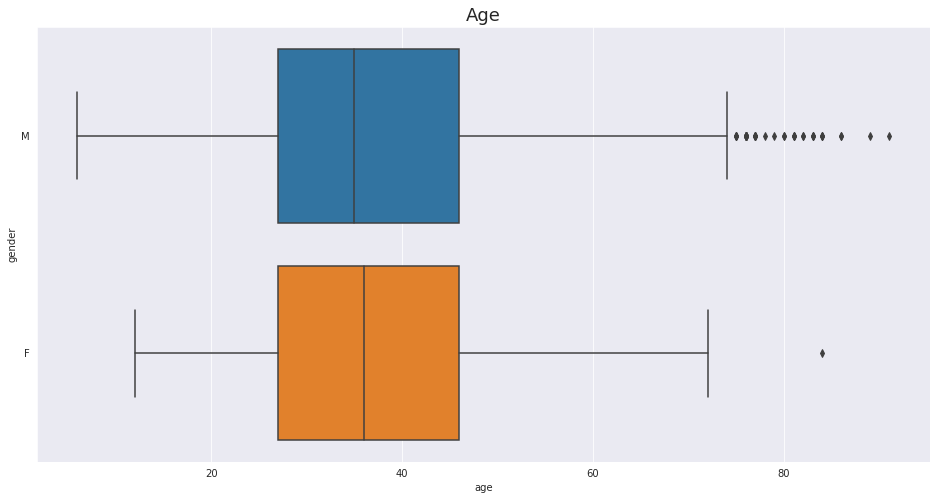

In [168]:
ax = sns.boxplot(x = 'age', y = 'gender', data = Fatal_police, orient = 'h')
ax.figure.set_size_inches(16, 8)
ax.set_title('Age', fontsize=18)
# ax.set_xlabel('years', fontsize=14)
ax

# **BoxPlots per The most 4 fatal states**

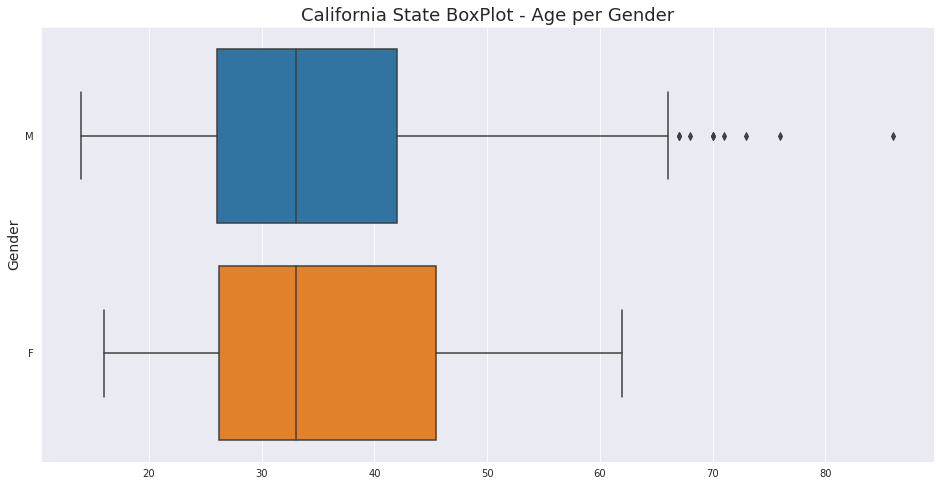

In [169]:
ax = sns.boxplot(x = 'age', y = 'gender', data = Fatal_police.query('state == "CA"'), orient = 'h')
ax.figure.set_size_inches(16, 8)
ax.set_title('California State BoxPlot - Age per Gender', fontsize=18)
ax.set_xlabel('', fontsize=14)
ax.set_ylabel('Gender', fontsize=14)
ax

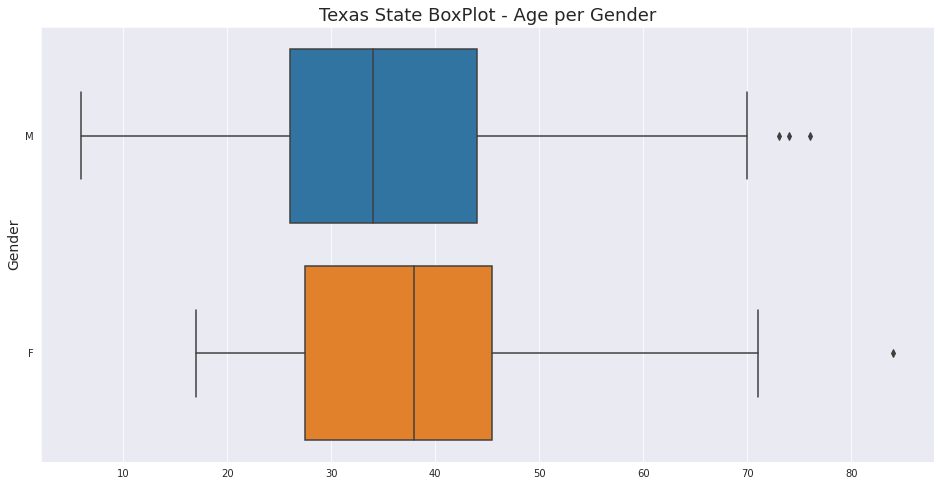

In [170]:
ax = sns.boxplot(x = 'age', y = 'gender', data = Fatal_police.query('state == "TX"'), orient = 'h')
ax.figure.set_size_inches(16, 8)
ax.set_title('Texas State BoxPlot - Age per Gender', fontsize=18)
ax.set_xlabel('', fontsize=14)
ax.set_ylabel('Gender', fontsize=14)
ax

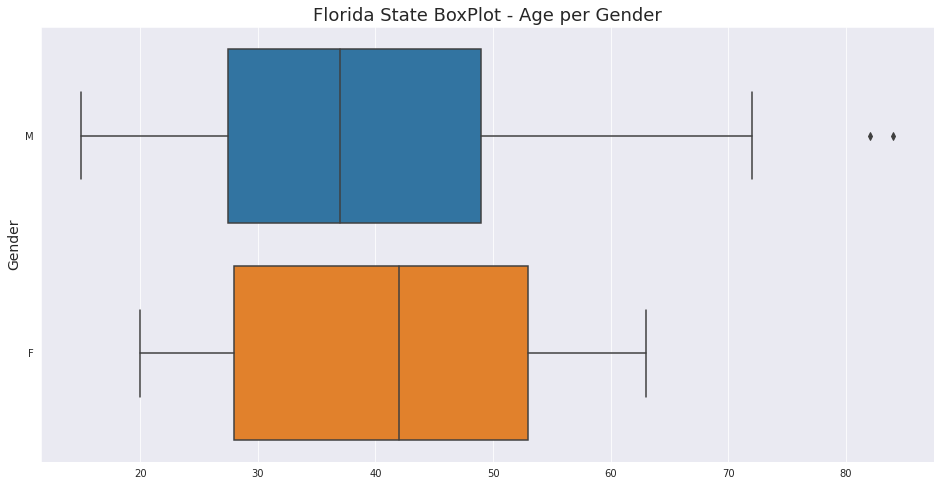

In [171]:
ax = sns.boxplot(x = 'age', y = 'gender', data = Fatal_police.query('state == "FL"'), orient = 'h')
ax.figure.set_size_inches(16, 8)
ax.set_title('Florida State BoxPlot - Age per Gender', fontsize=18)
ax.set_xlabel('', fontsize=14)
ax.set_ylabel('Gender', fontsize=14)
ax

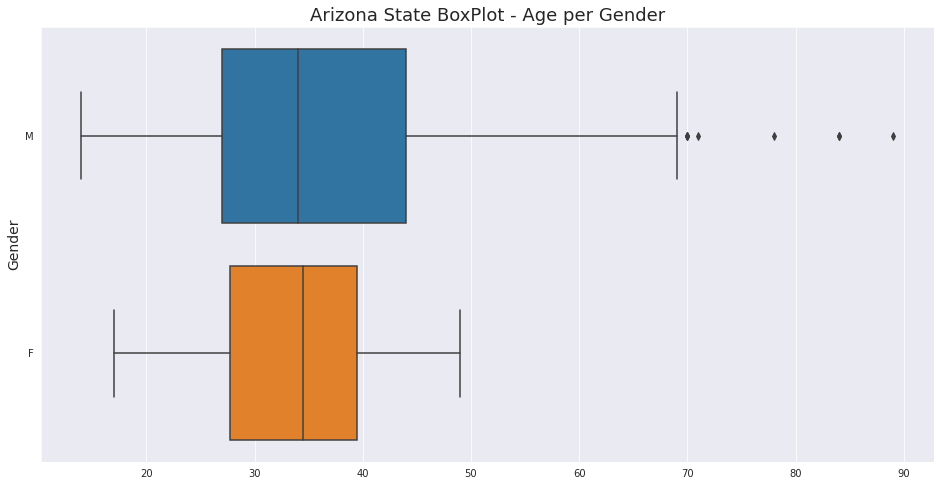

In [172]:
ax = sns.boxplot(x = 'age', y = 'gender', data = Fatal_police.query('state == "AZ"'), orient = 'h')
ax.figure.set_size_inches(16, 8)
ax.set_title('Arizona State BoxPlot - Age per Gender', fontsize=18)
ax.set_xlabel('', fontsize=14)
ax.set_ylabel('Gender', fontsize=14)
ax

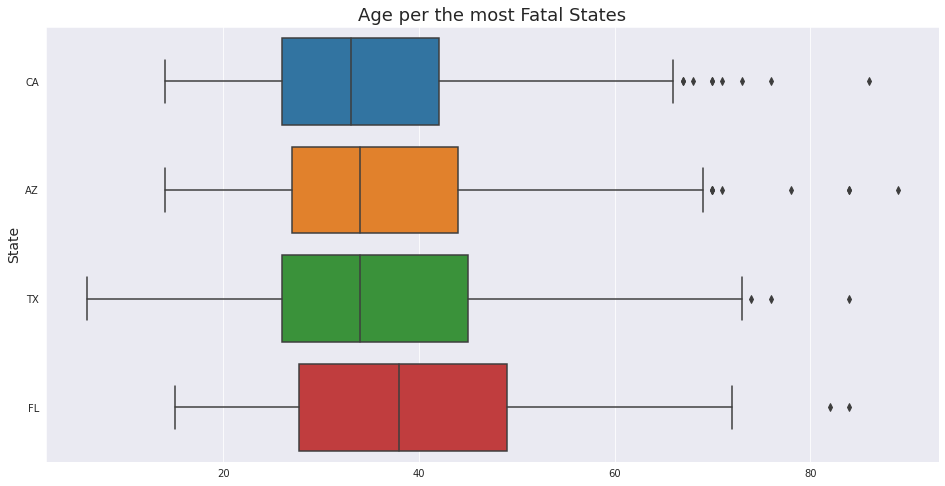

In [173]:
# Estados com maior numeros de tiros pela policia
ax = sns.boxplot(x = 'age', y = 'state', data = Fatal_police.query('state in ["CA","TX","FL","AZ"]'), orient = 'h')

ax.figure.set_size_inches(16, 8)    # Personalizando o tamanho da figura

ax.set_title('Age per the most Fatal States', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('State', fontsize=14)    # Configurando o label do eixo Y
# ax.set_yticklabels([key for key in uf.values()], fontsize=12)    # Configurando o label de cada categoria do eixo Y

ax


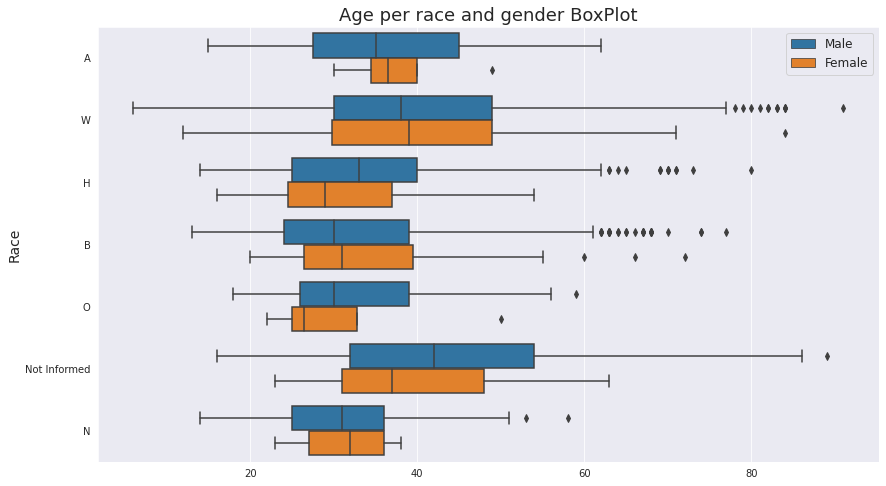

In [174]:
# ax = sns.boxplot(x = 'age', y = 'race', hue = 'gender', data=Fatal_police.query('state == "CA"'), orient='h')
ax = sns.boxplot(x = 'age', y = 'race', hue = 'gender', data=Fatal_police, orient='h')

ax.figure.set_size_inches(14, 8)    # Personalizando o tamanho da figura

# ax.set_title('Box-plot da RENDA por SEXO e COR', fontsize=18)    # Configurando o título do gráfico
ax.set_title('Age per race and gender BoxPlot', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('Race', fontsize=14)    # Configurando o label do eixo Y

# ax.set_yticklabels(['Asian', 'White', 'Hispanic', 'Black', 'Other', 'Não Informada', 'Native American'], fontsize=10)    
# Configurando o label de cada categoria do eixo Y

# Configurações da legenda do gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Male', 'Female'], fontsize=12)

ax

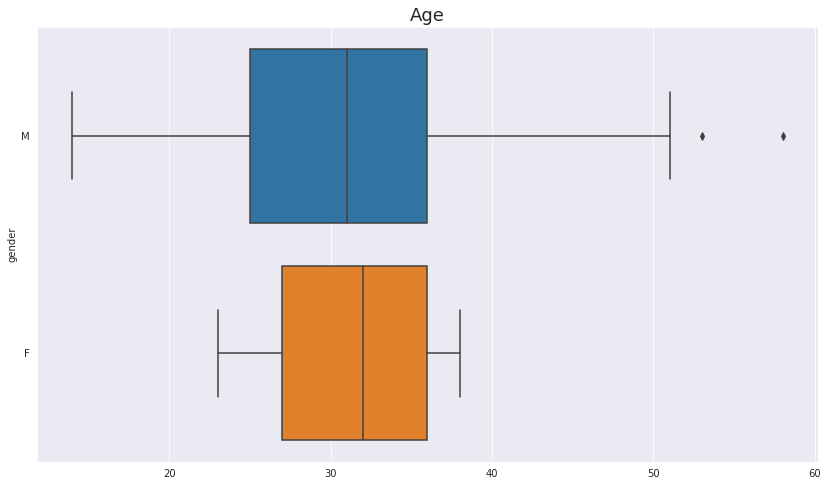

In [175]:
ax = sns.boxplot(x = 'age', y = 'gender', data = Fatal_police.query('race == "N"'), orient = 'h')
ax.figure.set_size_inches(14, 8)
ax.set_title('Age', fontsize=18)
ax.set_xlabel('', fontsize=14)
ax

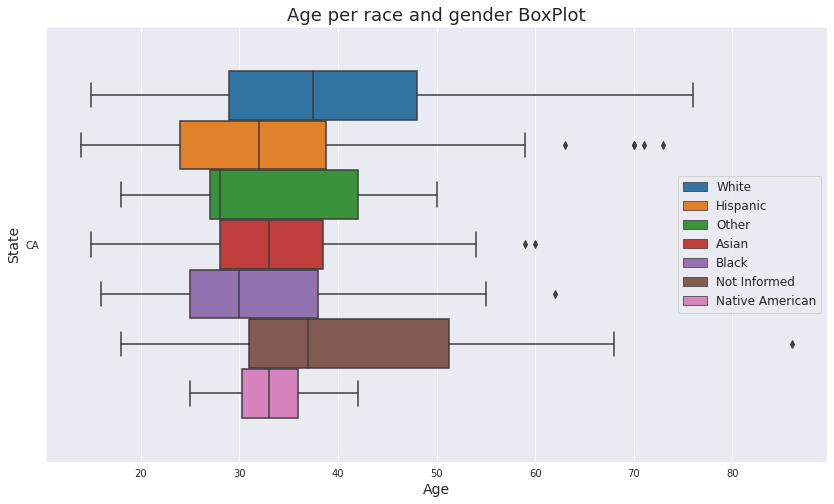

In [176]:
ax = sns.boxplot(x = 'age', y = 'state', hue = 'race', data=Fatal_police.query('state == "CA"'), orient='h')

ax.figure.set_size_inches(14, 8)    # Personalizando o tamanho da figura

# ax.set_title('Box-plot da RENDA por SEXO e COR', fontsize=18)    # Configurando o título do gráfico
ax.set_title('Age per race and gender BoxPlot', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('Age', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('State', fontsize=14)    # Configurando o label do eixo Y

# ax.set_yticklabels(['Asian', 'White', 'Hispanic', 'Black', 'Other', 'Não Informada', 'Native American'], fontsize=10)    
# Configurando o label de cada categoria do eixo Y

# Configurações da legenda do gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['White', 'Hispanic','Other', 'Asian','Black', 'Not Informed','Native American'], fontsize=12)

ax

In [177]:
# Media, Mediana, Minimo, Maximo por estado
qw = pd.crosstab(Fatal_police.state, 
                 Fatal_police.gender,                                 
                 aggfunc = {'mean', 'median', 'max','min'},
                 values = Fatal_police.age).round(2)
qw.rename(index = states_names, inplace = True)
qw.rename(columns = sex, inplace = True)
qw

max         mean        median          min      
gender         Female  Male Female   Male Female  Male Female  Male
state                                                              
Alaska           38.0  59.0  35.00  33.38   35.0  33.0   32.0  16.0
Alabama          41.0  77.0  36.71  40.89   36.0  38.0   32.0  16.0
Arkansas          NaN  83.0    NaN  39.95    NaN  37.0    NaN  16.0
Arizona          49.0  89.0  34.44  36.80   34.5  34.0   17.0  14.0
California       62.0  86.0  35.39  35.17   33.0  33.0   16.0  14.0
Colorado         59.0  72.0  35.20  35.86   32.0  34.0   17.0  17.0
Connecticut       NaN  62.0    NaN  36.29    NaN  31.0    NaN  16.0
DC               41.0  63.0  31.00  39.36   31.0  35.0   21.0  21.0
Delaware          NaN  60.0    NaN  33.00    NaN  28.0    NaN  16.0
Florida          63.0  84.0  40.38  38.91   42.0  37.0   20.0  15.0
Georgia          60.0  75.0  39.69  37.78   36.0  35.0   20.0  17.0
Hawaii           30.0  61.0  28.00  38.93   28.0  36.0   26.0  20.0
Iowa             39.0  53.0  34.00  31.41   34.0  29.0   29.0  19.0
Idaho            53.0  62.0  43.00  40.97   43.0  39.5   33.0  23.0
Illinois         55.0  63.0  43.75  32.25   44.5  32.0   31.0  16.0
Indiana          49.0  69.0  33.00  39.11   33.0  36.0   17.0  15.0
Kansas           53.0  65.0  43.33  36.04   51.0  33.0   26.0  17.0
Kentucky         35.0  75.0  28.75  40.20   28.5  38.0   23.0  18.0
Louisiana        71.0  66.0  58.00  36.07   58.0  34.5   45.0   6.0
Massachusetts     NaN  59.0    NaN  37.76    NaN  39.0    NaN  19.0
Maryland         45.0  76.0  30.00  35.76   26.0  33.0   23.0  16.0
Maine            18.0  65.0  18.00  41.14   18.0  37.0   18.0  16.0
Michigan         36.0  73.0  33.50  37.23   33.5  37.0   31.0  16.0
Minnesota        50.0  68.0  45.00  34.87   45.0  32.0   40.0  16.0
Missouri         61.0  70.0  33.90  36.02   29.0  33.0   21.0  15.0
Mississippi      24.0  76.0  22.50  38.09   22.5  36.0   21.0  15.0
Montana          49.0  59.0  49.00  36.65   49.0  36.0   49.0  19.0
North Carolina   60.0  83.0  43.60  39.53   45.0  37.0   20.0  18.0
North Dakota      NaN  42.0    NaN  31.00    NaN  30.0    NaN  24.0
Nebraska         39.0  66.0  39.00  36.96   39.0  33.0   39.0  22.0
New Hampshire     NaN  62.0    NaN  38.54    NaN  40.0    NaN  19.0
New Jersey       50.0  75.0  43.00  37.28   43.0  36.0   36.0  18.0
New Mexico       47.0  81.0  33.50  36.62   32.5  34.0   24.0  16.0
Nevada           50.0  77.0  45.00  38.05   48.0  36.0   37.0  18.0
New York         66.0  81.0  50.00  39.06   51.0  36.0   32.0  17.0
Ohio             36.0  76.0  28.67  36.89   28.0  34.0   22.0  13.0
Oklahoma         72.0  83.0  48.33  37.89   39.0  36.5   34.0  16.0
Oregon           55.0  77.0  44.00  39.87   44.0  38.0   33.0  17.0
Pennsylvania     47.0  91.0  33.67  37.64   42.0  33.0   12.0  16.0
Rhode Island      NaN  80.0    NaN  41.00    NaN  30.0    NaN  24.0
South Carolina   47.0  81.0  39.50  39.85   38.5  36.0   34.0  17.0
South Dakota      NaN  53.0    NaN  35.44    NaN  34.5    NaN  19.0
Tennessee        59.0  86.0  39.57  39.51   39.0  36.0   23.0  18.0
Texas            84.0  76.0  38.48  35.61   38.0  34.0   17.0   6.0
Utah              NaN  64.0    NaN  34.21    NaN  32.5    NaN  17.0
Virginia         57.0  71.0  36.67  36.70   29.5  33.5   25.0  15.0
Vermont           NaN  76.0    NaN  44.67    NaN  39.0    NaN  29.0
Washington       38.0  69.0  31.00  37.07   32.0  36.0   23.0  16.0
Wisconsin        25.0  77.0  25.00  37.21   25.0  35.0   25.0  14.0
West Virginia    49.0  82.0  47.00  42.67   47.0  41.0   45.0  21.0
Wyoming          39.0  58.0  39.00  39.92   39.0  39.0   39.0  21.0

In [178]:
state_race = pd.crosstab(Fatal_police.state, Fatal_police.race)
state_race.rename(index = states_names, inplace = True)
state_race.rename(columns = race, inplace = True)
state_race

race,Asian,Black,Hispanic,Native American,Not Informed,Other,White
state,,,,,,,
Alaska,2,3,0,9,4,0,22
Alabama,0,31,1,0,9,0,63
Arkansas,1,25,0,0,11,0,46
Arizona,0,17,84,13,35,0,109
California,30,125,321,4,113,9,223
Colorado,5,18,49,4,31,2,95
Connecticut,0,3,6,0,1,0,11
DC,0,12,0,0,0,0,1
Delaware,0,5,0,0,3,0,5


In [179]:
# Testando o crosstab Pandas acima
estado = Fatal_police.query('state == "AZ"')
estado["state"].count()
race = estado.query('race == "H"')
race["race"].count()

84

In [180]:
state_race.reset_index(level=0, inplace=True)

# state_count = pd.DataFrame(ad)
# state_count.reset_index(level=0, inplace=True)
# state_count.columns = ["state", "deaths_total"] 
# state_count.head()

state_race

race,state,Asian,Black,Hispanic,Native American,Not Informed,Other,White
0,Alaska,2,3,0,9,4,0,22
1,Alabama,0,31,1,0,9,0,63
2,Arkansas,1,25,0,0,11,0,46
3,Arizona,0,17,84,13,35,0,109
4,California,30,125,321,4,113,9,223
5,Colorado,5,18,49,4,31,2,95
6,Connecticut,0,3,6,0,1,0,11
7,DC,0,12,0,0,0,0,1
8,Delaware,0,5,0,0,3,0,5
9,Florida,1,113,52,0,35,5,162


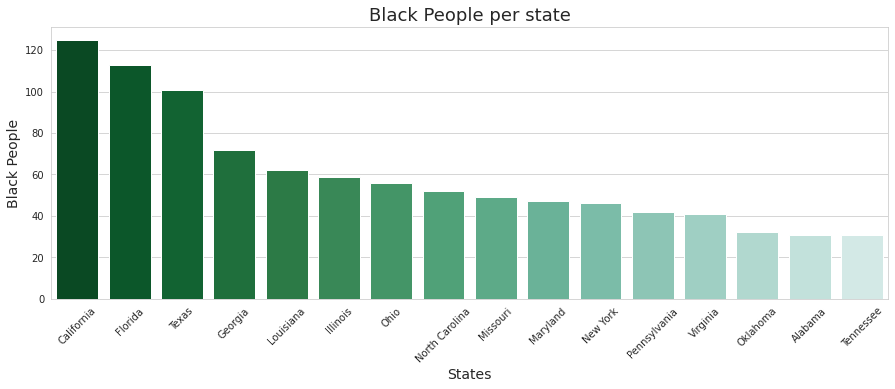

In [181]:
state_race_sort = state_race.sort_values('Black',ascending=False)

state_race_graf =  state_race_sort.query('Black > 30')

sns.set_style("whitegrid")
ax = sns.barplot(x= state_race_graf.state, 
                 y= state_race_graf.Black, 
                 data=state_race_graf, 
                 orient='v',
                 palette=sns.color_palette("BuGn_r", n_colors=len(state_race_graf) + 4))

ax.figure.set_size_inches(15, 5)    # Personalizando o tamanho da figura

ax.set_title('Black People per state', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('States', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('Black People', fontsize=14)    # Configurando o label do eixo Y
plt.xticks(rotation=45)
ax

In [182]:
xc = state_race.sort_values('Black',ascending=False)
xc.head(100)

race,state,Asian,Black,Hispanic,Native American,Not Informed,Other,White
4,California,30,125,321,4,113,9,223
9,Florida,1,113,52,0,35,5,162
43,Texas,6,101,147,1,57,3,179
10,Georgia,4,72,10,0,23,0,79
18,Louisiana,2,62,1,0,9,0,39
14,Illinois,0,59,13,0,5,0,28
35,Ohio,2,56,1,0,11,3,86
27,North Carolina,1,52,8,0,13,0,88
24,Missouri,1,49,3,0,19,0,73
20,Maryland,1,47,3,0,2,0,26


In [183]:
# Validations
Fatal_police.query('state == "OK"')['gender'].value_counts()

M    167
F      3
Name: gender, dtype: int64

In [184]:
# Per State, count female
Fatal_police.query('gender == "F"')['state'].value_counts().head()

CA    40
TX    32
FL    21
AZ    17
GA    13
Name: state, dtype: int64

In [185]:
# Genero por estado
# qa = pd.crosstab(Fatal_police.state, 
#                  Fatal_police.gender,                                 
#                  aggfunc = {'count'},
#                  values = Fatal_police.id).round(2)

# qa.rename(index = states_names, inplace = True)
# qa.rename(columns = sex, inplace = True)
# qa

state_gender = pd.crosstab(Fatal_police.state, Fatal_police.gender)
state_gender.rename(index = states_names, inplace = True)
state_gender.rename(columns = sex, inplace = True)
state_gender

gender,Female,Male
state,,
Alaska,2,38
Alabama,7,97
Arkansas,1,82
Arizona,17,241
California,40,785
Colorado,6,198
Connecticut,0,21
DC,2,11
Delaware,0,13
